# Reading Data

##  Loading the data


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import nltk
import string
import seaborn
import re
import string as sns  # Tutorial about Python regular expressions: https://pymotw.com/2/re/
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt


from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter 
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm



C:\Users\hp\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
clut_ar = pd.read_csv('Reviews.csv', nrows= 30000)
clut_ar.shape

(30000, 10)

In [5]:
def partition(x):
    if x < 3:
        return 0
    return 1

actualScore = clut_ar['Score']
positiveNegative = actualScore.map(partition) 
clut_ar['Score'] = positiveNegative
print("Number of data points in our data", clut_ar.shape)
clut_ar.head(3)

Number of data points in our data (30000, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


## Data Cleaning: Deduplication

In [6]:
#Sorting data according to ProductId in ascending order
sorted_data=clut_ar.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [7]:
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(28687, 10)

In [8]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(clut_ar['Id'].size*1.0)*100

95.62333333333333

In [9]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [10]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

(28687, 10)


1    24480
0     4207
Name: Score, dtype: int64

#  Featurization

In [11]:
x = clut_ar['Text'].values
y= clut_ar['Score'].values

##  BAG OF WORDS

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33) 
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33) 


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train) 
X_train_bow = vectorizer.transform(X_train)
X_cv_bow = vectorizer.transform(X_cv)
X_test_bow = vectorizer.transform(X_test)

print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)

(13467,) (13467,)
(6633,) (6633,)
(9900,) (9900,)
After vectorizations
(13467, 22164) (13467,)
(6633, 22164) (6633,)
(9900, 22164) (9900,)


<h2> Applying Kmeans </h2>

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10) 
kmeans.fit(X_train_bow)
kmeans.labels_
kmeans.predict(X_train_bow)
kmeans.cluster_centers_

array([[0.00798315, 0.00033263, 0.        , ..., 0.00011088, 0.00099789,
        0.00088702],
       [0.01378122, 0.00057422, 0.00028711, ..., 0.00028711, 0.00200976,
        0.00114844],
       [0.03163842, 0.00903955, 0.        , ..., 0.00112994, 0.01920904,
        0.00225989],
       [0.0375    , 0.0125    , 0.        , ..., 0.0125    , 0.025     ,
        0.        ]])

In [14]:
print(kmeans.predict(X_train_bow))
print('='*80)
print(kmeans.cluster_centers_)
print('='*80)
print(kmeans.labels_)
print('='*80)

[0 1 1 ... 0 2 0]
[[0.00798315 0.00033263 0.         ... 0.00011088 0.00099789 0.00088702]
 [0.01378122 0.00057422 0.00028711 ... 0.00028711 0.00200976 0.00114844]
 [0.03163842 0.00903955 0.         ... 0.00112994 0.01920904 0.00225989]
 [0.0375     0.0125     0.         ... 0.0125     0.025      0.        ]]
[0 1 1 ... 0 2 0]


<h2> Applying Elbow-Knee Methon For Best K </h2>

In [15]:
from sklearn.model_selection import GridSearchCV
for i in range(1,10):
    clf = KMeans(n_clusters = i)
param_grid = {'n_clusters':[1,2, 3, 4, 5, 6, 7, 8, 9] }
gsv = GridSearchCV(clf,param_grid,verbose=1)
gsv.fit(X_train_bow,y_train)
print("Best Cluster: ",gsv.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 77.8min finished


Best Cluster:  {'n_clusters': 9}


In [16]:
list_of_sent=[]
for sentance in X_train:
    list_of_sent.append(sentance.split())

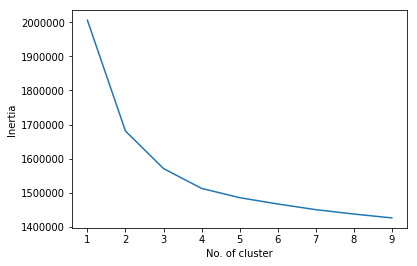

In [17]:
#https://github.com/Manish-12/Clustering-Techniques-on-Amazon-fine-food-reviews/blob/master/Kmeans.ipynb
dic = {}
for i in range(1,10):
    clus = KMeans(n_clusters = i)
    clus.fit(X_train_bow)
    dic[i] = clus.inertia_
plt.plot(list(dic.keys()), list(dic.values()))
plt.xlabel("No. of cluster")
plt.ylabel("Inertia")
plt.show()

<h2> WordCloud For KMeans </h2>

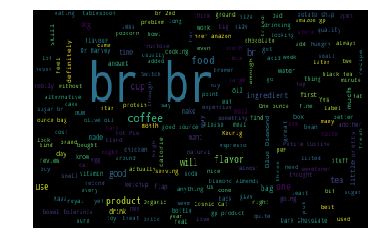

In [18]:
#https://github.com/Manish-12/Clustering-Techniques-on-Amazon-fine-food-reviews/blob/master/Kmeans.ipynb
clf = KMeans(n_clusters = 8)
p = clf.fit_predict(X_train_bow)

index = []
for i in range(len(p)):
    if p[i] == 1:
        index.append(i)
        
len(index)
text = []
for i in range(len(index)):
    text.append(list_of_sent[index[i]])
    
from wordcloud import WordCloud
from matplotlib.pyplot import figure
t_b = ''
for j in range(len(text)):
    for i in range(len(text[j])):
        t_b = t_b + text[j][i] + ' '

word_cloud = WordCloud(relative_scaling = 1.0).generate(t_b)
plt.imshow(word_cloud,aspect='auto')
plt.axis('off')
plt.show()    

<h2>=====================================================================</h2>

##  TF-IDF

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
vectorizer_1 =  TfidfVectorizer()
vectorizer_1.fit(X_train) 

X_train_tfidf = vectorizer.transform(X_train)
X_cv_tfidf = vectorizer.transform(X_cv)
X_test_tfidf = vectorizer.transform(X_test)

print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)
print(X_cv_tfidf.shape, y_cv.shape)
print(X_test_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(13467, 22164) (13467,)
(6633, 22164) (6633,)
(9900, 22164) (9900,)


<h2> Applying Kmeans </h2>

In [20]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10) 
kmeans.fit(X_train_tfidf)
kmeans.labels_
kmeans.predict(X_train_tfidf)
kmeans.cluster_centers_

array([[0.01376541, 0.00057356, 0.00028678, ..., 0.00028678, 0.00200746,
        0.00114712],
       [0.03121516, 0.00891862, 0.        , ..., 0.00111483, 0.01895206,
        0.00222965],
       [0.00799911, 0.0003333 , 0.        , ..., 0.0001111 , 0.00099989,
        0.00088879],
       [0.03658537, 0.01219512, 0.        , ..., 0.01219512, 0.02439024,
        0.        ]])

In [21]:
print(kmeans.predict(X_train_tfidf))
print('='*80)
print(kmeans.cluster_centers_)
print('='*80)
print(kmeans.labels_)
print('='*80)

[2 0 0 ... 2 1 2]
[[0.01376541 0.00057356 0.00028678 ... 0.00028678 0.00200746 0.00114712]
 [0.03121516 0.00891862 0.         ... 0.00111483 0.01895206 0.00222965]
 [0.00799911 0.0003333  0.         ... 0.0001111  0.00099989 0.00088879]
 [0.03658537 0.01219512 0.         ... 0.01219512 0.02439024 0.        ]]
[2 0 0 ... 2 1 2]


<h2> Applying Elbow-Knee Methon For Best K </h2>

In [22]:
from sklearn.model_selection import GridSearchCV
for i in range(1,10):
    clf = KMeans(n_clusters = i)
param_grid = {'n_clusters':[1,2, 3, 4, 5, 6, 7, 8, 9] }
gsv = GridSearchCV(clf,param_grid,verbose=1)
gsv.fit(X_train_tfidf,y_train)
print("Best Cluster: ",gsv.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 79.3min finished


Best Cluster:  {'n_clusters': 9}


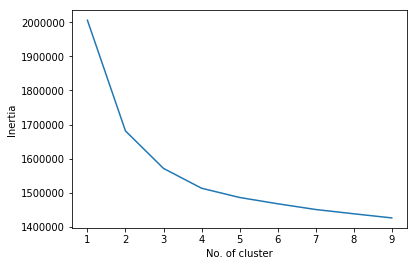

In [23]:
#https://github.com/Manish-12/Clustering-Techniques-on-Amazon-fine-food-reviews/blob/master/Kmeans.ipynb
dic = {}
for i in range(1,10):
    clus = KMeans(n_clusters = i)
    clus.fit(X_train_tfidf)
    dic[i] = clus.inertia_
plt.plot(list(dic.keys()), list(dic.values()))
plt.xlabel("No. of cluster")
plt.ylabel("Inertia")
plt.show()

<h2> WordCloud For KMeans </h2>

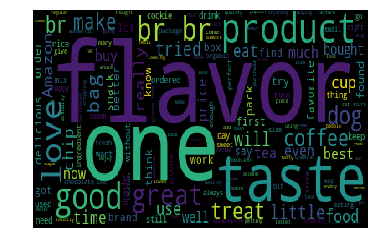

In [24]:
#https://github.com/Manish-12/Clustering-Techniques-on-Amazon-fine-food-reviews/blob/master/Kmeans.ipynb
clf = KMeans(n_clusters = 9)
a = clf.fit_predict(X_train_tfidf)

index = []
for i in range(len(a)):
    if a[i] == 1:
        index.append(i)
        
len(index)
text = []
for i in range(len(index)):
    text.append(list_of_sent[index[i]])
    
from wordcloud import WordCloud
from matplotlib.pyplot import figure
t_b = ''
for j in range(len(text)):
    for i in range(len(text[j])):
        t_b = t_b + text[j][i] + ' '

word_cloud = WordCloud(relative_scaling = 1.0).generate(t_b)
plt.imshow(word_cloud,aspect='auto')
plt.axis('off')
plt.show()    

<h2> ========================================================================= </h2>

##  Word2Vec

In [25]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


stop = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')


def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/|]',r' ',cleaned)
    return cleaned

print(stop)
print('******************************************')
print(sno.stem('tasty'))


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
{'himself', "didn't", 'which', 'while', 'you', 'off', 'i', 'then', "couldn't", 'needn', 'ours', 'mustn', 'same', 'as', 'over', 'during', 'a', 'y', 'ma', "mustn't", 'weren', 'now', 'itself', 'why', 'am', 'haven', "wouldn't", 'all', 'whom', 'are', 'did', 'how', 'again', 'should', 'doesn', "hadn't", 'theirs', "don't", 'isn', 'only', "you'd", 'so', 'here', 'doing', 'her', 'ain', 'm', 'no', 'yourselves', "it's", 'he', 'where', 'this', "you're", 'in', 'both', 'do', 'further', 'too', 're', "weren't", 'being', 'herself', 'my', 'wasn', 'its', 'was', 'aren', 'his', 'what', "that'll", 'your', 'is', 'few', "needn't", "shan't", 'it', 'below', 'having', 'of', 'very', 'out', 'will', 'after', 'from', 'more', "hasn't", 'has', 'because', 'll', 'if', 'some', 'until', 'just', 's', 'when', 'hadn', "mightn't", 'about', 'under', 'shan', 'before', "doesn't", 'myself', 'be', 'o', 'on', 'been', 'against', 'thos

In [26]:
i=0
str1=''
final_string=[]
all_positive_words=[]
all_negative_words=[]
s=''
for sent in clut_ar['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (clut_ar['Score'].values)[i] == 'positive':
                        all_positive_words.append(s)
                    if (clut_ar['Score'].values)[i] == 'negative':
                        all_negative_words.append(s)
                    else:
                        continue
                else:
                    continue
    str1 = b" ".join(filtered_sentence)
   # print("***********************************************************************888")
    final_string.append(str1)
    i+=1

In [27]:
clut_ar['CleanedText']=final_string

In [28]:
import gensim
from gensim.models import word2vec
from gensim.models import keyedvectors
import pickle
i=0
list_of_sent=[]
for sent in clut_ar['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue
    list_of_sent.append(filtered_sentence) 

In [29]:
print(clut_ar['Text'].values[0])
print("***********************************************************************************")
print(list_of_sent[0])
# conda install gensim

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
***********************************************************************************
['i', 'have', 'bought', 'several', 'of', 'the', 'vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', 'the', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', 'my', 'labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most']


In [30]:
i=0
list_of_sentance_train=[]
for sentance in X_train:
    list_of_sentance_train.append(sentance.split())

In [31]:
w2v_model=Word2Vec(list_of_sentance_train,min_count=5,size=50, workers=4)

In [32]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  11797
sample words  ["It's", 'hard', 'to', 'find', 'a', 'good', 'quality', 'dog', 'treat', 'at', 'the', 'grocery', 'stores', 'and', 'even', 'most', 'pet', 'stores.', 'Many', 'have', 'added', 'sugars', 'artificial', 'ingredients', 'as', 'well', 'harmful', 'chemicals.', 'But', 'these', 'nothing', 'but', 'natural', 'you', 'can', 'rice,', 'fruits,', 'vegetables,', 'cheese', 'etc.', 'Made', 'in', 'grown', 'North', 'America.', 'My', 'dogs', 'love', 'them,', 'treats']


In [33]:
from tqdm import tqdm 
sent_vectors = [];
for sent in tqdm(list_of_sent):
    sent_vec = np.zeros(50)
    cnt_words =0;
    for word in sent:
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [02:26<00:00, 204.92it/s]


30000
50


<h2> Word2Vec In Train Data </h2>

In [34]:
sent_vectors_train = []; 
for sent in tqdm(list_of_sentance_train): 
    sent_vec = np.zeros(50) 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
sent_vectors_train = np.array(sent_vectors_train)
print(sent_vectors_train.shape)
print(sent_vectors_train[0])

100%|███████████████████████████████████████████████████████████████████████████| 13467/13467 [01:55<00:00, 116.40it/s]


(13467, 50)
[-0.10457382  0.06333311 -0.02096282 -0.5512041  -0.14199683 -0.00236351
  0.20421323 -0.35189615  0.20166237 -0.61621877 -0.12823153  0.42686244
  0.03153159 -0.16674811 -0.24052196  0.3332024   0.10300841 -0.39013841
  0.17368365  0.29315471 -0.18413057 -0.02371396 -0.20189495  0.17655332
 -0.10932525 -0.22835547  0.26222669 -0.15021647  0.20556332  0.13175278
  0.11848418  0.12060755  0.26813519  0.19798249 -0.42766284 -0.00341162
  0.30933586 -0.03407761 -0.03234827  0.0189308   0.21055428 -0.10894367
  0.31295938  0.0740459  -0.24634456 -0.15959333  0.00448981 -0.36246186
  0.31285807 -0.07109457]


<h2> Word2Vec In Cross-Validation Data </h2>

In [35]:
i=0
list_of_sentance_cv=[]
for sentance in X_cv:
    list_of_sentance_cv.append(sentance.split())

In [36]:
sent_vectors_cv = []; 
for sent in tqdm(list_of_sentance_cv): 
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
sent_vectors_cv = np.array(sent_vectors_cv)
print(sent_vectors_cv.shape)
print(sent_vectors_cv[0])

100%|█████████████████████████████████████████████████████████████████████████████| 6633/6633 [00:46<00:00, 141.57it/s]


(6633, 50)
[ 2.63430856e-01 -7.06170740e-03 -3.16299319e-01 -1.20900683e+00
 -8.30966722e-02  1.10187122e-01  1.01050488e+00 -7.03304380e-01
  1.05734640e+00 -6.25574562e-01 -1.98248342e-01  1.11151121e+00
 -4.91449933e-01 -4.72154324e-01 -2.10447076e-01 -6.36925314e-02
 -2.67432512e-01 -2.40535349e-01  9.76618039e-01  6.83629246e-01
 -3.24590803e-01  3.90393307e-01 -3.62191719e-01  5.41331899e-01
  3.46172852e-01 -7.80582655e-01  2.76951658e-01 -4.79865989e-01
  1.20436845e-01  5.52859233e-01 -6.05584757e-02  4.55863143e-02
  4.04173472e-04  2.99416120e-01 -4.70131056e-02  3.62654711e-01
  1.94354254e-01  8.64719018e-02 -1.11230113e+00  4.44885647e-01
  2.64860692e-01 -5.01174298e-01  6.11861350e-01  8.25874293e-01
 -3.10264680e-01 -4.98798949e-02  2.40522536e-01 -7.30000291e-01
  4.24015913e-01 -2.85758518e-01]


<h2> Word2Vec In Test Data </h2>

In [37]:
i=0
list_of_sentance_test=[]
for sentance in X_test:
    list_of_sentance_test.append(sentance.split())

In [38]:
sent_vectors_test = []; 
for sent in tqdm(list_of_sentance_test): 
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
sent_vectors_test = np.array(sent_vectors_test)
print(sent_vectors_test.shape)
print(sent_vectors_test[0])

100%|█████████████████████████████████████████████████████████████████████████████| 9900/9900 [01:21<00:00, 121.54it/s]


(9900, 50)
[-0.03028415  0.29001079  0.08284528 -0.94524237  0.17956536 -0.00390814
  0.35708683 -0.30197871  0.7003748  -1.05223466 -0.13425823  0.91190597
 -0.22398501 -0.43496315 -0.57579183  0.34677986 -0.37605512 -0.21614617
  0.86673453  0.62853063  0.0236905   0.08301894 -0.30301102  0.39630409
 -0.20452969 -0.14263419  0.35426803 -0.74403063  0.39210917  0.51029609
 -0.12796449 -0.05625389  0.42457486  0.43872963 -0.18446742 -0.07284697
  0.14815987 -0.10166715 -0.45476142  0.71429302  0.12485682 -0.67766369
  0.29566243  0.61365884 -0.43557976  0.12790705 -0.00360828 -0.59699811
  0.09160771 -0.00810957]


<h2> Applying KMeans </h2>

In [39]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=5) 
kmeans.fit(sent_vectors_train)
kmeans.labels_
kmeans.predict(sent_vectors_train)[0:10]
kmeans.cluster_centers_

array([[-1.55926782e-05,  1.10041928e-04,  4.75253592e-05,
        -4.48704437e-04, -1.32889192e-04,  1.41601456e-06,
         3.37915408e-04, -2.71914311e-04,  2.87423031e-04,
        -4.31558327e-04, -1.80936569e-05,  3.30169410e-04,
        -7.21420061e-05, -1.46727620e-04, -1.34610723e-04,
         2.00505665e-04, -7.02203287e-05, -1.68308583e-04,
         2.31924533e-04,  2.43158692e-04, -2.43841706e-05,
         1.06410320e-04, -9.97507308e-05,  1.93322695e-04,
        -6.73904763e-05, -1.67054772e-04,  1.81261816e-04,
        -2.81781582e-04,  1.28814967e-04,  1.78503237e-04,
         3.80699575e-05, -1.38717191e-05,  1.77931266e-04,
         1.93401670e-04, -2.10454206e-04,  1.04890249e-06,
         1.31701581e-04,  6.79726839e-05, -1.92071674e-04,
         1.24384688e-04,  1.34120834e-04, -2.65096711e-04,
         2.63398033e-04,  2.45909825e-04, -1.45059315e-04,
        -1.16611921e-04,  2.38032012e-05, -3.45875696e-04,
         9.31804377e-05, -4.07091343e-05],
       [-3.32

In [40]:
print(kmeans.predict(sent_vectors_train))
print('='*80)
print(kmeans.cluster_centers_)
print('='*80)
print(kmeans.labels_)
print('='*80)

[3 1 2 ... 0 0 0]
[[-1.55926782e-05  1.10041928e-04  4.75253592e-05 -4.48704437e-04
  -1.32889192e-04  1.41601456e-06  3.37915408e-04 -2.71914311e-04
   2.87423031e-04 -4.31558327e-04 -1.80936569e-05  3.30169410e-04
  -7.21420061e-05 -1.46727620e-04 -1.34610723e-04  2.00505665e-04
  -7.02203287e-05 -1.68308583e-04  2.31924533e-04  2.43158692e-04
  -2.43841706e-05  1.06410320e-04 -9.97507308e-05  1.93322695e-04
  -6.73904763e-05 -1.67054772e-04  1.81261816e-04 -2.81781582e-04
   1.28814967e-04  1.78503237e-04  3.80699575e-05 -1.38717191e-05
   1.77931266e-04  1.93401670e-04 -2.10454206e-04  1.04890249e-06
   1.31701581e-04  6.79726839e-05 -1.92071674e-04  1.24384688e-04
   1.34120834e-04 -2.65096711e-04  2.63398033e-04  2.45909825e-04
  -1.45059315e-04 -1.16611921e-04  2.38032012e-05 -3.45875696e-04
   9.31804377e-05 -4.07091343e-05]
 [-3.32164354e-03  1.63807759e-02  1.42892131e-01 -5.11214201e-01
  -9.11376707e-02  1.05457387e-02  3.24002001e-01 -2.19277557e-01
   2.63330452e-01 -5.76

<h2> Applying Elbow-Knee Methon For Best K </h2>

In [41]:
from sklearn.model_selection import GridSearchCV
for i in range(1,10):
    clf = KMeans(n_clusters = i)
param_grid = {'n_clusters':[1,2, 3, 4, 5, 6, 7, 8, 9] }
gsv = GridSearchCV(clf,param_grid,verbose=1)
gsv.fit(sent_vectors_train,y_train)
print("Best Cluster: ",gsv.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   22.0s finished


Best Cluster:  {'n_clusters': 9}


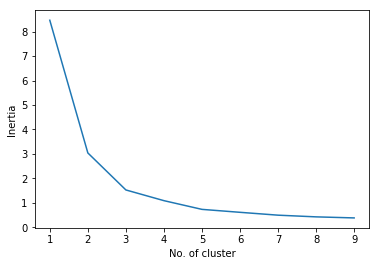

In [42]:
#https://github.com/Manish-12/Clustering-Techniques-on-Amazon-fine-food-reviews/blob/master/Kmeans.ipynb
dic = {}
for i in range(1,10):
    clus = KMeans(n_clusters = i)
    clus.fit(sent_vectors_train)
    dic[i] = clus.inertia_
plt.plot(list(dic.keys()), list(dic.values()))
plt.xlabel("No. of cluster")
plt.ylabel("Inertia")
plt.show()

<h2> WordCloud For KMeans </h2>

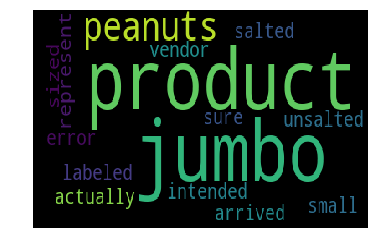

In [43]:
#https://github.com/Manish-12/Clustering-Techniques-on-Amazon-fine-food-reviews/blob/master/Kmeans.ipynb
clf = KMeans(n_clusters = 9)
b = clf.fit_predict(sent_vectors_train)

index = []
for i in range(len(b)):
    if b[i] == 1:
        index.append(i)
        
len(index)
text = []
for i in range(len(index)):
    text.append(list_of_sent[index[i]])
    
from wordcloud import WordCloud
from matplotlib.pyplot import figure
t_b = ''
for j in range(len(text)):
    for i in range(len(text[j])):
        t_b = t_b + text[j][i] + ' '

word_cloud = WordCloud(relative_scaling = 1.0).generate(t_b)
plt.imshow(word_cloud,aspect='auto')
plt.axis('off')
plt.show()    

<h2> ====================================================================== </h2>

<h2> AvgWord2Vec </h2>

<h2> AvgWord2Vec In Train Data </h2>

In [44]:
from tqdm import tqdm 
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(clut_ar['CleanedText'].values)

dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))


tfidf_feat = model.get_feature_names()
tfidf_sent_vectors_train = [];
row=0;
for sent in tqdm(list_of_sentance_train):
    sent_vec = np.zeros(50)
    weight_sum =0;
    for word in sent:
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))  
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row += 1
    
tfidf_sent_vectors_train = np.array(sent_vectors_train)
print(tfidf_sent_vectors_train.shape)
print(tfidf_sent_vectors_train[0])

100%|████████████████████████████████████████████████████████████████████████████| 13467/13467 [11:35<00:00, 19.36it/s]


(13467, 50)
[-0.10457382  0.06333311 -0.02096282 -0.5512041  -0.14199683 -0.00236351
  0.20421323 -0.35189615  0.20166237 -0.61621877 -0.12823153  0.42686244
  0.03153159 -0.16674811 -0.24052196  0.3332024   0.10300841 -0.39013841
  0.17368365  0.29315471 -0.18413057 -0.02371396 -0.20189495  0.17655332
 -0.10932525 -0.22835547  0.26222669 -0.15021647  0.20556332  0.13175278
  0.11848418  0.12060755  0.26813519  0.19798249 -0.42766284 -0.00341162
  0.30933586 -0.03407761 -0.03234827  0.0189308   0.21055428 -0.10894367
  0.31295938  0.0740459  -0.24634456 -0.15959333  0.00448981 -0.36246186
  0.31285807 -0.07109457]


<h2> AvgWord2Vec In Cross-Validation Data </h2>

In [45]:
from tqdm import tqdm 
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(clut_ar['CleanedText'].values)

dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))


tfidf_feat = model.get_feature_names()
tfidf_sent_vectors_cv = [];
row=0;
for sent in tqdm(list_of_sentance_cv):
    sent_vec = np.zeros(50)
    weight_sum =0;
    for word in sent:
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))  
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_cv.append(sent_vec)
    row += 1
    
tfidf_sent_vectors_cv = np.array(sent_vectors_cv)
print(tfidf_sent_vectors_cv.shape)
print(tfidf_sent_vectors_cv[0])

100%|██████████████████████████████████████████████████████████████████████████████| 6633/6633 [05:44<00:00, 19.25it/s]


(6633, 50)
[ 2.63430856e-01 -7.06170740e-03 -3.16299319e-01 -1.20900683e+00
 -8.30966722e-02  1.10187122e-01  1.01050488e+00 -7.03304380e-01
  1.05734640e+00 -6.25574562e-01 -1.98248342e-01  1.11151121e+00
 -4.91449933e-01 -4.72154324e-01 -2.10447076e-01 -6.36925314e-02
 -2.67432512e-01 -2.40535349e-01  9.76618039e-01  6.83629246e-01
 -3.24590803e-01  3.90393307e-01 -3.62191719e-01  5.41331899e-01
  3.46172852e-01 -7.80582655e-01  2.76951658e-01 -4.79865989e-01
  1.20436845e-01  5.52859233e-01 -6.05584757e-02  4.55863143e-02
  4.04173472e-04  2.99416120e-01 -4.70131056e-02  3.62654711e-01
  1.94354254e-01  8.64719018e-02 -1.11230113e+00  4.44885647e-01
  2.64860692e-01 -5.01174298e-01  6.11861350e-01  8.25874293e-01
 -3.10264680e-01 -4.98798949e-02  2.40522536e-01 -7.30000291e-01
  4.24015913e-01 -2.85758518e-01]


<h2> AvgWord2Vec In Test Data </h2>

In [46]:
from tqdm import tqdm 
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(clut_ar['CleanedText'].values)

dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))


tfidf_feat = model.get_feature_names()n
tfidf_sent_vectors_test = [];
row=0;
for sent in tqdm(list_of_sentance_test):
    sent_vec = np.zeros(50)
    weight_sum =0;
    for word in sent:
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))  
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1
tfidf_sent_vectors_test = np.array(sent_vectors_test)
print(tfidf_sent_vectors_test.shape)
print(tfidf_sent_vectors_test[0])   

100%|██████████████████████████████████████████████████████████████████████████████| 9900/9900 [07:09<00:00, 23.06it/s]


(9900, 50)
[-0.03028415  0.29001079  0.08284528 -0.94524237  0.17956536 -0.00390814
  0.35708683 -0.30197871  0.7003748  -1.05223466 -0.13425823  0.91190597
 -0.22398501 -0.43496315 -0.57579183  0.34677986 -0.37605512 -0.21614617
  0.86673453  0.62853063  0.0236905   0.08301894 -0.30301102  0.39630409
 -0.20452969 -0.14263419  0.35426803 -0.74403063  0.39210917  0.51029609
 -0.12796449 -0.05625389  0.42457486  0.43872963 -0.18446742 -0.07284697
  0.14815987 -0.10166715 -0.45476142  0.71429302  0.12485682 -0.67766369
  0.29566243  0.61365884 -0.43557976  0.12790705 -0.00360828 -0.59699811
  0.09160771 -0.00810957]


<h2> Applying KMeans </h2>

In [47]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10) 
kmeans.fit(tfidf_sent_vectors_train)
kmeans.labels_
kmeans.predict(tfidf_sent_vectors_train)
kmeans.cluster_centers_

array([[-7.36853267e-06,  8.20677404e-05,  3.89042987e-05,
        -3.57900383e-04, -1.03298624e-04,  1.24738623e-06,
         2.69836934e-04, -2.12697142e-04,  2.28833977e-04,
        -3.40974756e-04, -1.76230001e-05,  2.62987436e-04,
        -5.77761145e-05, -1.16144893e-04, -1.04089436e-04,
         1.57176485e-04, -5.72508409e-05, -1.31360994e-04,
         1.86756188e-04,  1.87720010e-04, -1.90805505e-05,
         8.78668980e-05, -7.92212118e-05,  1.52609261e-04,
        -5.16994115e-05, -1.33273258e-04,  1.45846449e-04,
        -2.22992005e-04,  1.02661355e-04,  1.40049287e-04,
         2.58624394e-05, -9.42577225e-06,  1.42396516e-04,
         1.52732001e-04, -1.60311727e-04,  1.48602317e-06,
         1.05207967e-04,  5.33202074e-05, -1.56134113e-04,
         9.65913650e-05,  1.06768800e-04, -2.09981656e-04,
         2.10544777e-04,  1.96779054e-04, -1.14364782e-04,
        -9.77256464e-05,  2.10767624e-05, -2.76216660e-04,
         7.36812623e-05, -3.54429994e-05],
       [-5.39

In [48]:
print(kmeans.predict(tfidf_sent_vectors_train))
print('='*80)
print(kmeans.cluster_centers_)
print('='*80)
print(kmeans.labels_)
print('='*80)

[1 1 2 ... 0 0 0]
[[-7.36853267e-06  8.20677404e-05  3.89042987e-05 -3.57900383e-04
  -1.03298624e-04  1.24738623e-06  2.69836934e-04 -2.12697142e-04
   2.28833977e-04 -3.40974756e-04 -1.76230001e-05  2.62987436e-04
  -5.77761145e-05 -1.16144893e-04 -1.04089436e-04  1.57176485e-04
  -5.72508409e-05 -1.31360994e-04  1.86756188e-04  1.87720010e-04
  -1.90805505e-05  8.78668980e-05 -7.92212118e-05  1.52609261e-04
  -5.16994115e-05 -1.33273258e-04  1.45846449e-04 -2.22992005e-04
   1.02661355e-04  1.40049287e-04  2.58624394e-05 -9.42577225e-06
   1.42396516e-04  1.52732001e-04 -1.60311727e-04  1.48602317e-06
   1.05207967e-04  5.33202074e-05 -1.56134113e-04  9.65913650e-05
   1.06768800e-04 -2.09981656e-04  2.10544777e-04  1.96779054e-04
  -1.14364782e-04 -9.77256464e-05  2.10767624e-05 -2.76216660e-04
   7.36812623e-05 -3.54429994e-05]
 [-5.39477310e-02  3.98569448e-02  6.09646569e-02 -5.31209150e-01
  -1.16567252e-01  4.09111346e-03  2.64107617e-01 -2.85586853e-01
   2.32496412e-01 -5.96

<h2> Applying Elbow-Knee Methon For Best K </h2>

In [49]:
from sklearn.model_selection import GridSearchCV
for i in range(1,10):
    clf = KMeans(n_clusters = i)
param_grid = {'n_clusters':[1,2, 3, 4, 5, 6, 7, 8, 9] }
gsv = GridSearchCV(clf,param_grid,verbose=1)
gsv.fit(tfidf_sent_vectors_train,y_train)
print("Best Cluster: ",gsv.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   22.3s finished


Best Cluster:  {'n_clusters': 9}


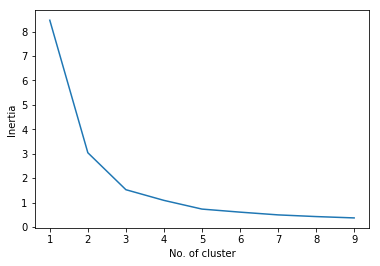

In [50]:
dic = {}
for i in range(1,10):
    clus = KMeans(n_clusters = i)
    clus.fit(tfidf_sent_vectors_train)
    dic[i] = clus.inertia_
plt.plot(list(dic.keys()), list(dic.values()))
plt.xlabel("No. of cluster")
plt.ylabel("Inertia")
plt.show()

<h2> WoedCloud For KMeans </h2>

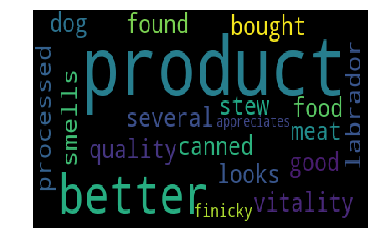

In [51]:
clf = KMeans(n_clusters = 8)
b = clf.fit_predict(tfidf_sent_vectors_train)

index = []
for i in range(len(b)):
    if b[i] == 1:
        index.append(i)
        
len(index)
text = []
for i in range(len(index)):
    text.append(list_of_sent[index[i]])
    
from wordcloud import WordCloud
from matplotlib.pyplot import figure
t_b = ''
for j in range(len(text)):
    for i in range(len(text[j])):
        t_b = t_b + text[j][i] + ' '

word_cloud = WordCloud(relative_scaling = 1.0).generate(t_b)
plt.imshow(word_cloud,aspect='auto')
plt.axis('off')
plt.show()    

# Conclusion:-

1. First loaded an Amzon fine food reviwes dataset and then split in train and test and cross-validation for featurization.
2. Then applied KMeans cluster in train dataset only.
3. Then find hyper parametrer best N_cluster and how many cluster in kmreans and find best cluster in KMeans.
4. Then used ELBOW_KNEE_Method and created a plot between N_Clusters and Inertia .
5. Then plot a WordCloud for Kmeans where all words are ploted which is highly repeated in KMeans cluter in highlited way like  in big words

<h2> ================================================================= </h2>